In [70]:
#pip install qiskit
#pip install pylatexenc

In [202]:
import numpy as np
import random as rnd
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import *
from qiskit.circuit.gate import Gate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_clifford

In [146]:
#Returns a QC with the prepared stated and the ancilla

def Initial_Circuit_Gen(initial_state,k,n):
    qr = QuantumRegister(k, 'phi')
    qn = QuantumCircuit(qr)
    li = [i for i in qr]
    qn.initialize(initial_state,li)
    qa = QuantumRegister(n, 'q')
    qa = QuantumCircuit(qa)
    qa = qa.compose(qn)
    return qa


In [250]:
#Add random 2-qubit Clifford gates to circuit to a random pair of qubits 

def Add_Clifford_Gates(circuit, n, m):
    ind =[i for i in range(n)]
    for i in range(int(np.ceil(n*m*np.log2(n)**2))):
        cliff = random_clifford(2)
        cliff = cliff.to_instruction()
        cliff.name = 'Cliff {}'.format(i)
        rnd.shuffle(ind)
        circuit.append(cliff, ind[:2])
           

In [275]:
#qubits - list of lists with each list having 2 elements representing the prepared states
#n - number o
#m - parameter for minimum number of gates to apply (should be set 0.13-0.15)

def RLC_Encoder(initial_state, k, n, m):
    Initial_Circuit = Initial_Circuit_Gen(initial_state, k ,n)
    Add_Clifford_Gates(Initial_Circuit, n ,m)
    
    return Initial_Circuit
    

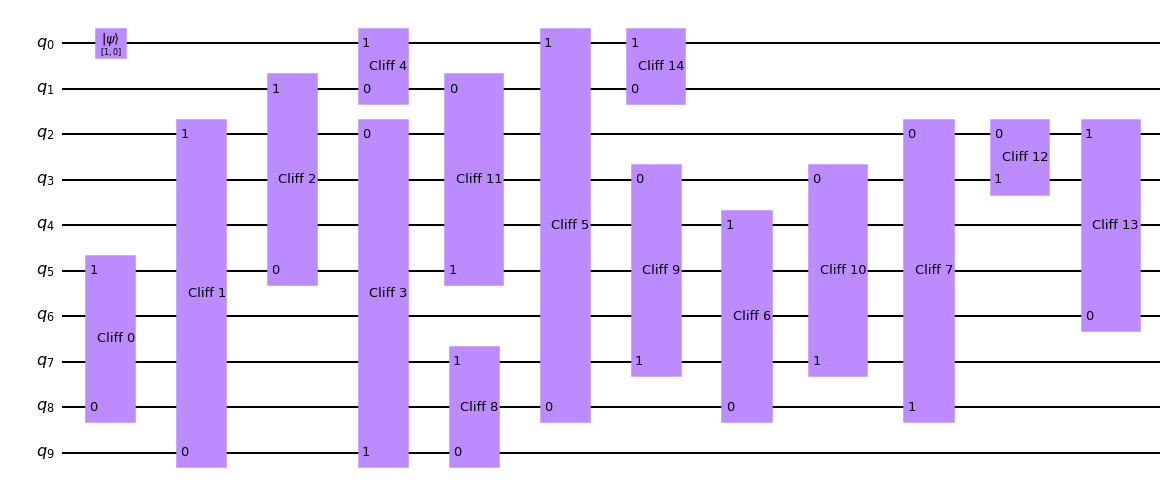

In [276]:
RLC_Encoder([1*complex(1,0),0],1,10,0.13).draw('mpl')

In [33]:
initial_state=[1/(np.sqrt(4))*complex(1,0),1/(np.sqrt(4))*complex(1,0),1/(np.sqrt(4))*complex(1,0),1/(np.sqrt(4))*complex(1,0)]
qr = QuantumRegister(2, 'phi')
qc = QuantumCircuit(qr)
qc.initialize(initial_state,[qr[0],qr[1]])
print(type(qc))
#print(qc.draw('mpl'))

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


In [16]:
qc.decompose().draw()

┌─────────────────────────────────────┐
phi_0: ─|0>─┤0                                    ├
            │  State Preparation(0.5,0.5,0.5,0.5) │
phi_1: ─|0>─┤1                                    ├
            └─────────────────────────────────────┘

In [177]:
a=random_clifford(2, seed=1)
b=QuantumCircuit(2)
a = a.to_instruction()
b.append(a,[0,1])
b.draw()

┌───────────────────────────────────────────────────────────────────────┐
q_0: ┤0                                                                      ├
     │  Clifford: Stabilizer = ['+ZI', '-ZY'], Destabilizer = ['-YZ', '+IZ'] │
q_1: ┤1                                                                      ├
     └───────────────────────────────────────────────────────────────────────┘